In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline



import warnings
warnings.filterwarnings('ignore')

In [2]:
ipl=pd.read_csv('ipl_2022_dataset.csv')

In [3]:
ipl.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [4]:
ipl.shape

(633, 8)

In [5]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           633 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 39.7+ KB


In [6]:
ipl.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

### cleaning

In [7]:
# I droping 'Unnamed: 0' columun
ipl.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
# Resulte after drop 'Unnamed: 0' columns
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [9]:
# finding total null value each data set
ipl.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [10]:
# cheak the null values from Cost IN $ (000) 
ipl[ipl['Cost IN $ (000)'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [11]:
# Fillings or replace the COST IN ₹ (CR.),Cost IN $ (000) columns null vlues from '0'

ipl['COST IN ₹ (CR.)']=ipl['COST IN ₹ (CR.)'].fillna(0)



In [12]:
ipl['Cost IN $ (000)']=ipl['Cost IN $ (000)'].fillna(0)

In [13]:
# Filling or replacing "2021 Squad" columns null values with " not picked" 
ipl['2021 Squad']=ipl['2021 Squad'].fillna("not picked")

In [14]:
# Result after filling null values
ipl.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

In [15]:
#  add teams columns
teams=ipl[ipl['COST IN ₹ (CR.)']>0]['Team'].unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [16]:
# create another columns
ipl['Status']=ipl['Team'].replace(teams,'sold')

In [17]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold


In [18]:
# cheack duplicate player 

ipl[ipl['Player'].duplicated(keep=False)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,sold
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.0,DC,Unsold,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.0,not picked,Unsold,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,not picked,Unsold,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.0,not picked,Unsold,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.0,not picked,Unsold,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.0,not picked,Unsold,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,not picked,Unsold,Unsold


In [19]:
# create 3 columns  retention, base price,base price units

ipl['retention'] = ipl['Base Price']


In [20]:

ipl['retention'].replace(['2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh','50 Lakh', '30 Lakh','1.5 Cr'],'In Auction', inplace = True)
ipl['retention']

0      Draft Pick
1      Draft Pick
2      In Auction
3      In Auction
4      Draft Pick
          ...    
628    In Auction
629    In Auction
630    In Auction
631    In Auction
632    In Auction
Name: retention, Length: 633, dtype: object

In [21]:
# treating base price



In [22]:
ipl['Base Price'].replace('Draft Pick',0, inplace = True)
ipl['Base Price']

0            0
1            0
2         2 Cr
3      40 Lakh
4            0
        ...   
628    20 Lakh
629    20 Lakh
630    20 Lakh
631    20 Lakh
632    20 Lakh
Name: Base Price, Length: 633, dtype: object

In [23]:
ipl['base_price_unit'] = ipl['Base Price'].apply(lambda x: str(x).split(' ')[-1])
ipl['base_price'] = ipl['Base Price'].apply(lambda x: str(x).split(' ')[0])

In [24]:
ipl['base_price_unit']

0         0
1         0
2        Cr
3      Lakh
4         0
       ... 
628    Lakh
629    Lakh
630    Lakh
631    Lakh
632    Lakh
Name: base_price_unit, Length: 633, dtype: object

In [25]:
ipl['base_price']

0       0
1       0
2       2
3      40
4       0
       ..
628    20
629    20
630    20
631    20
632    20
Name: base_price, Length: 633, dtype: object

In [26]:
ipl['base_price'].unique()

array(['0', '2', '40', '20', '1', '75', '50', '30', 'Retained', '1.5'],
      dtype=object)

In [27]:

ipl['base_price'].replace('Retained',0,inplace=True)

In [28]:
ipl['base_price'].unique()

array(['0', '2', '40', '20', '1', '75', '50', '30', 0, '1.5'],
      dtype=object)

## Analysis

In [29]:
# Q1 How many player participated in 2022 ipl acution?

ipl.shape[0]


633

In [30]:
# Q1.2 how many type of player have participated?

types=ipl['TYPE'].value_counts()
types.reset_index()


,index,TYPE
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


[]

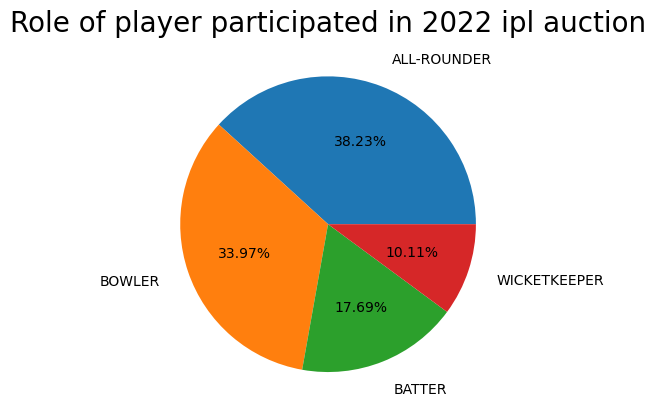

In [31]:
# pie chart according Q1 and Q1.2
plt.pie(types.values,labels=types.index,labeldistance=1.2,autopct='%1.2f%%')
plt.title('Role of player participated in 2022 ipl auction',fontsize=20)
plt.plot()

In [32]:
# Q2  Count players sold and unsold using groupby 
ipl.groupby('Status')['Player'].count()

Status
Unsold    396
sold      237
Name: Player, dtype: int64

[]

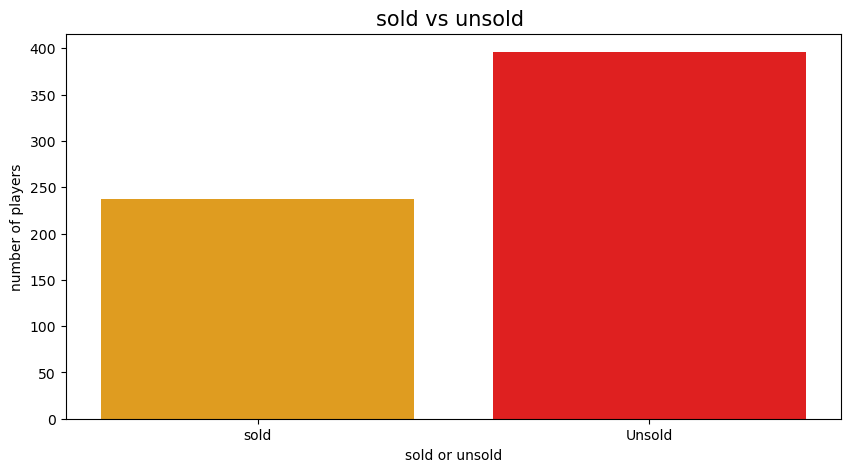

In [33]:
#players sold and unsold using a bar graph.
plt.figure(figsize=(10,5))
fig=sns.countplot(ipl['Status'],palette=['orange','red'])
plt.xlabel('sold or unsold')
plt.ylabel('number of players')
plt.title("sold vs unsold ",fontsize=15)
plt.plot()

[]

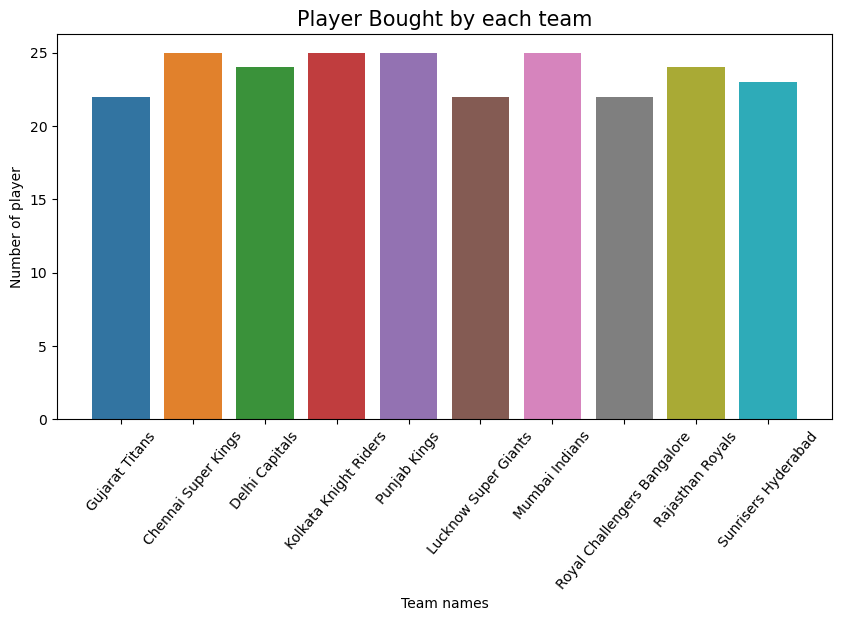

In [34]:
#Q3. players sold and unsold using a bar graph.



plt.figure(figsize=(10,5))
fig=sns.countplot(ipl[ipl['Team']!='Unsold']['Team'])
plt.xlabel('Team names')
plt.ylabel('Number of player')
plt.title('Player Bought by each team',fontsize=15)
plt.xticks(rotation=50)
plt.plot()


In [35]:
# 4. How many Players were Braught for each Role

ipl.groupby(['TYPE','Status'])['Player'].count().reset_index()

,TYPE,Status,Player
0,ALL-ROUNDER,Unsold,154
1,ALL-ROUNDER,sold,88
2,BATTER,Unsold,67
3,BATTER,sold,45
4,BOWLER,Unsold,138
5,BOWLER,sold,77
6,WICKETKEEPER,Unsold,37
7,WICKETKEEPER,sold,27


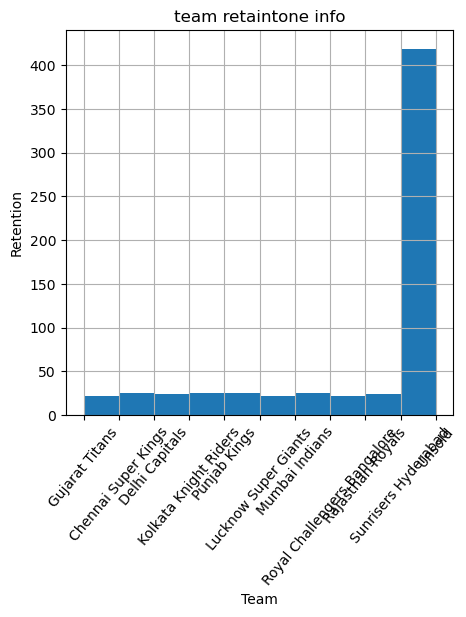

In [36]:
plt.figure(figsize=(5,5))
plt.hist(ipl['Team'])
plt.title("team retaintone info")
plt.xlabel('Team')
plt.ylabel('Retention')
plt.xticks(rotation=50)
plt.grid()
plt.show()


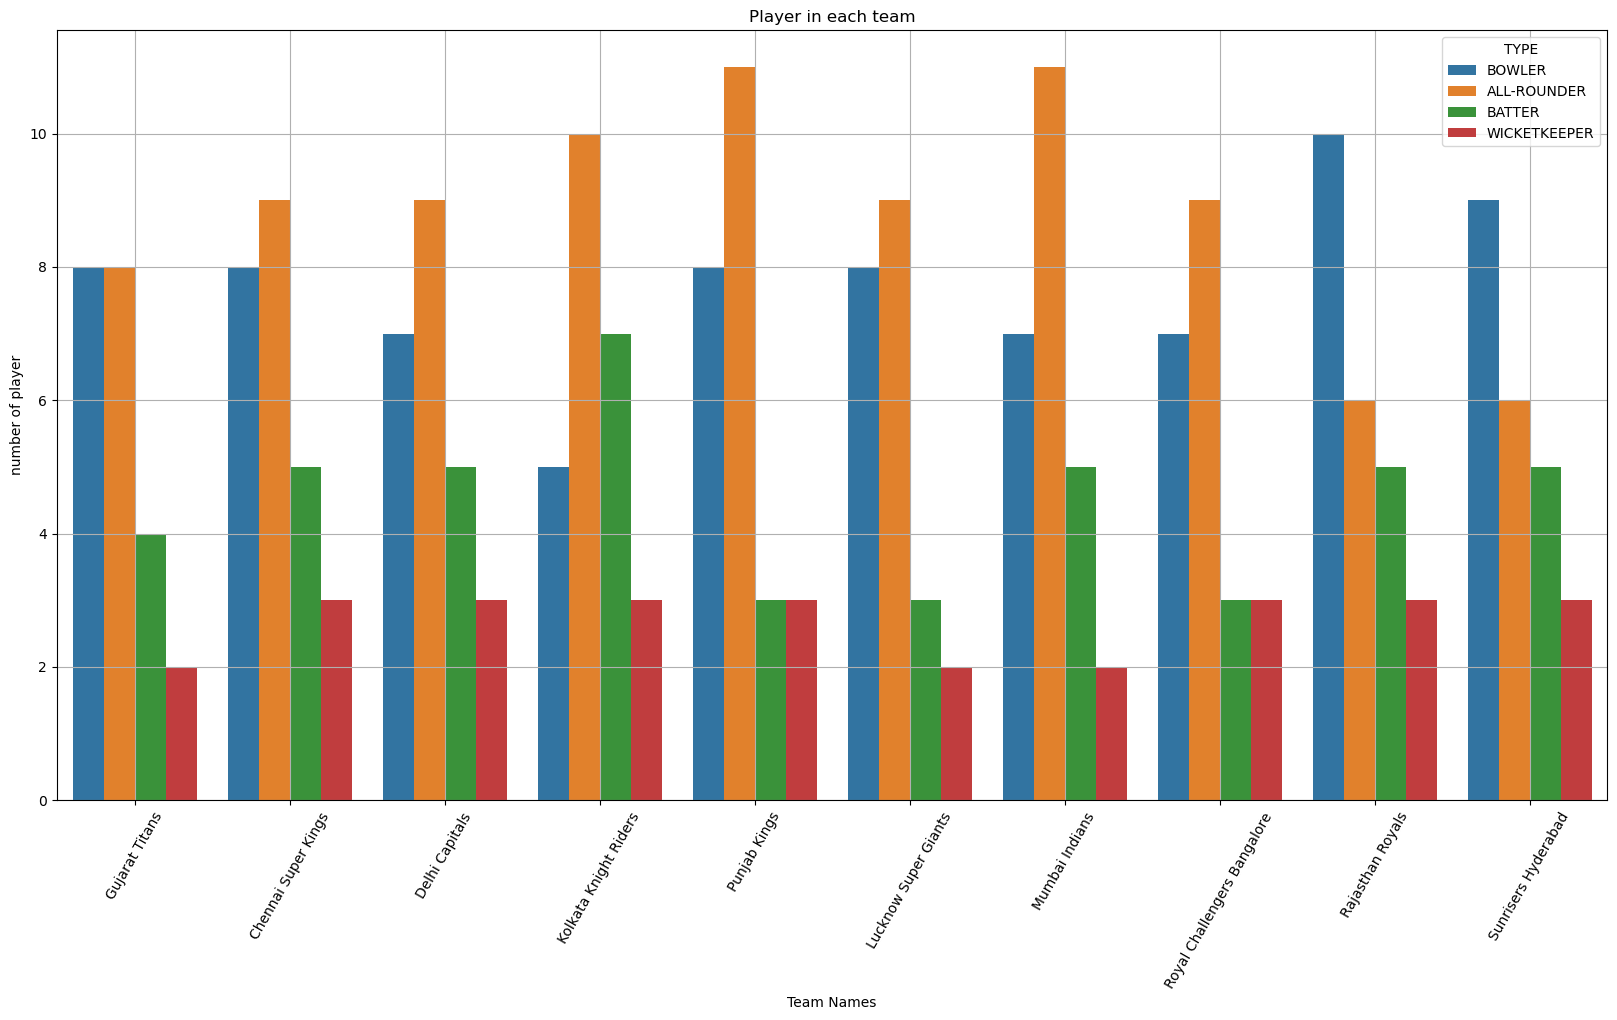

In [37]:
#Q.5 how many  bowler , all rounder, bastman ,wicket keeper in every teams





plt.figure(figsize=(20,10))
fig=sns.countplot(ipl[ipl['Team']!='Unsold']['Team'],hue=ipl['TYPE'])
plt.title('Player in each team')
plt.xlabel('Team Names')
plt.ylabel('number of player')
plt.xticks(rotation=60)
plt.grid()

In [38]:
 # 6. Which Are the players who participated in IPL 2021 and will be participating in IPL 2022 and playing in same team

ipl.replace({'SRH':'Sunrisers Hyderabad','CSK':'Chennai Super Kings','MI':'Mumbai Indians',
            'KKR':'Kolkata Knight Riders','RR':'Rajasthan Royals','PBKS':'Punjab Kings',
            'DC':'Delhi Capitals','RCB':'Royal Challengers Bangalore'},inplace =True)


In [39]:
same_team = ipl[(ipl['Team']==ipl['2021 Squad']) & (ipl['retention']=='In Auction')]
same_team

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,retention,base_price_unit,base_price
23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,Cr,2
26,Ambati Rayudu,2 Cr,WICKETKEEPER,6.75,877.5,Chennai Super Kings,Chennai Super Kings,sold,In Auction,Cr,2
28,Dwayne Bravo,2 Cr,ALL-ROUNDER,4.40,572.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,Cr,2
31,Robin Uthappa,2 Cr,BATTER,2.00,260.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,Cr,2
32,Mitchell Santner,1 Cr,ALL-ROUNDER,1.90,247.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,Cr,1
39,K.Bhagath Varma,20 Lakh,ALL-ROUNDER,0.20,26.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,Lakh,20
41,N. Jagadeesan,20 Lakh,WICKETKEEPER,0.20,26.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,Lakh,20
42,C.Hari Nishaanth,20 Lakh,BATTER,0.20,26.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,Lakh,20
43,K.M. Asif,20 Lakh,BOWLER,0.20,26.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,Lakh,20
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,Delhi Capitals,Delhi Capitals,sold,In Auction,Lakh,20


In [40]:

#7. How many Players Brought by Each Team

ipl.sample()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,retention,base_price_unit,base_price
407,Keemo Paul,75 Lakh,ALL-ROUNDER,0.0,0.0,not picked,Unsold,Unsold,In Auction,Lakh,75


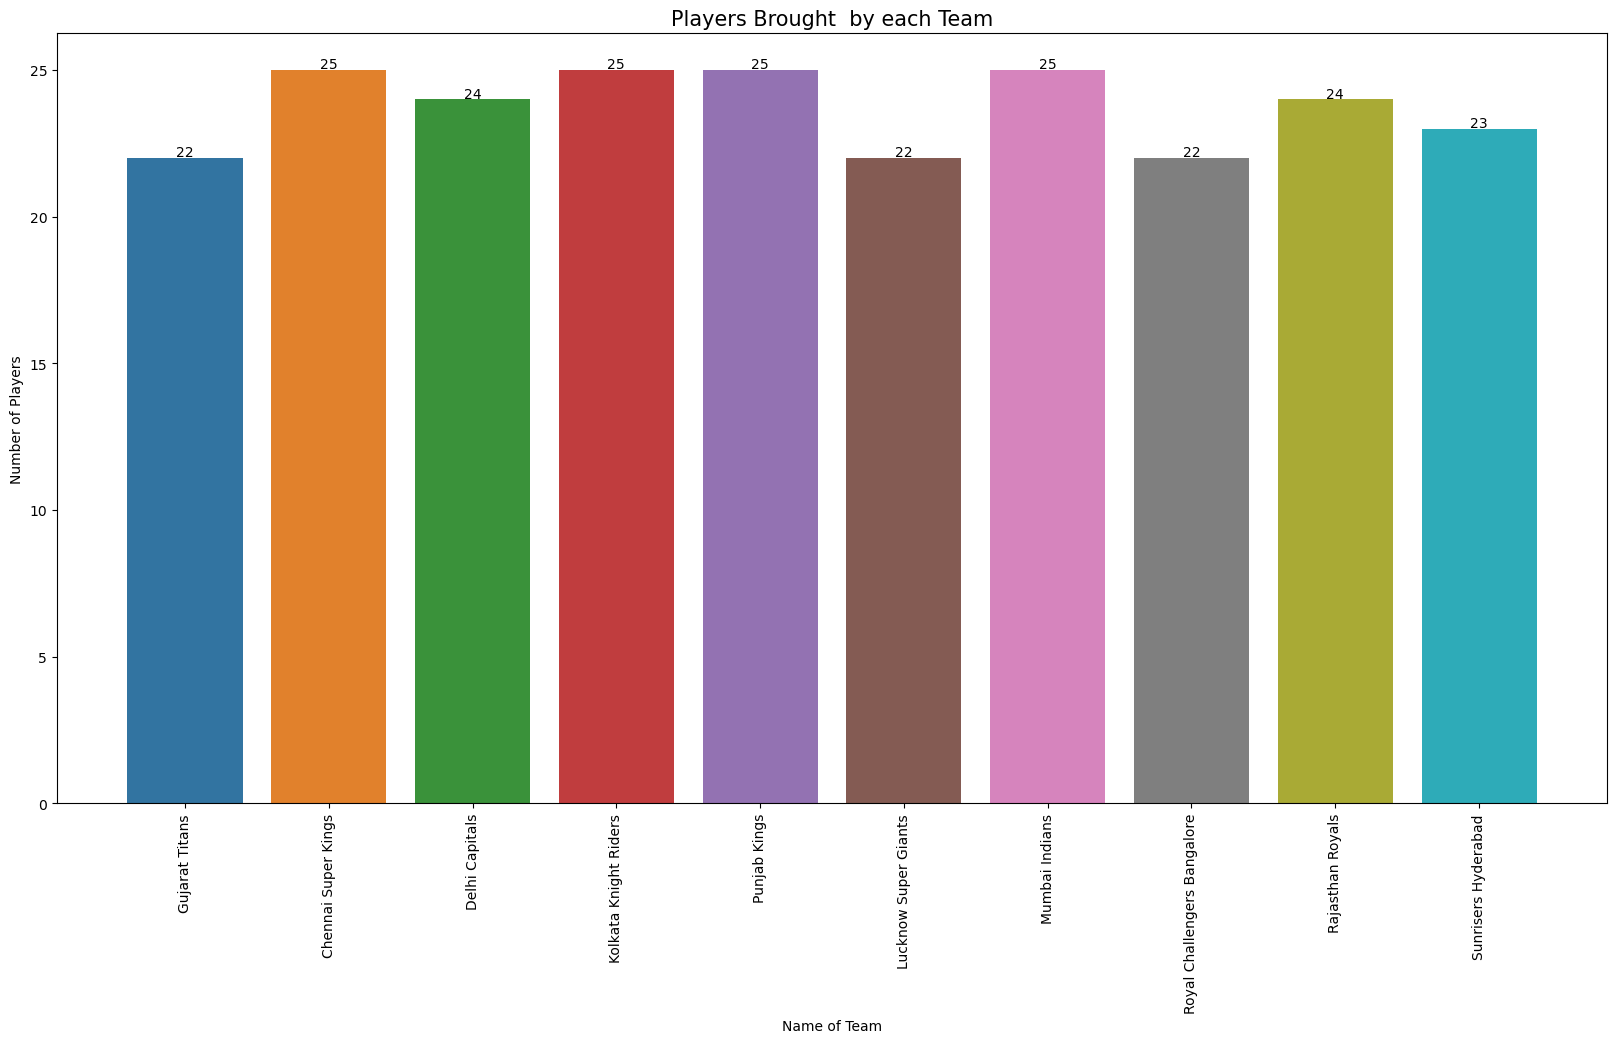

In [41]:
plt.figure(figsize=(20,10))
fig = sns.countplot(ipl[ipl['Team']!='Unsold']['Team'])
plt.xlabel('Name of Team')
plt.ylabel('Number of Players')
plt.title('Players Brought  by each Team', fontsize=15)
plt.xticks(rotation=90)
plt.plot()

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')

In [42]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,retention,base_price_unit,base_price
0,Rashid Khan,0,BOWLER,15.0,1950.0,Sunrisers Hyderabad,Gujarat Titans,sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,Mumbai Indians,Gujarat Titans,sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,Kolkata Knight Riders,Gujarat Titans,sold,In Auction,Cr,2
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,Rajasthan Royals,Gujarat Titans,sold,In Auction,Lakh,40
4,Shubman Gill,0,BATTER,8.0,1040.0,Kolkata Knight Riders,Gujarat Titans,sold,Draft Pick,0,0


In [43]:
# 8. How many players Retained/DraftPicked by Each team ?

ipl.groupby(['Team','retention'])['retention'].count()[:-1]

Team                         retention 
Chennai Super Kings          In Auction    21
                             Retained       4
Delhi Capitals               In Auction    20
                             Retained       4
Gujarat Titans               Draft Pick     3
                             In Auction    19
Kolkata Knight Riders        In Auction    21
                             Retained       4
Lucknow Super Giants         Draft Pick     3
                             In Auction    19
Mumbai Indians               In Auction    21
                             Retained       4
Punjab Kings                 In Auction    23
                             Retained       2
Rajasthan Royals             In Auction    21
                             Retained       3
Royal Challengers Bangalore  In Auction    19
                             Retained       3
Sunrisers Hyderabad          In Auction    20
                             Retained       3
Name: retention, dtype: int64

In [50]:

#9. Amount Spent by each team in Auction

amount_spent = ipl.groupby('Team')['COST IN ₹ (CR.)'].sum()[:-1]
amount_spent

Team
Chennai Super Kings            87.05
Delhi Capitals                 86.40
Gujarat Titans                 89.65
Kolkata Knight Riders          81.55
Lucknow Super Giants           89.40
Mumbai Indians                 89.90
Punjab Kings                   84.55
Rajasthan Royals               89.05
Royal Challengers Bangalore    88.45
Sunrisers Hyderabad            89.90
Name: COST IN ₹ (CR.), dtype: float64

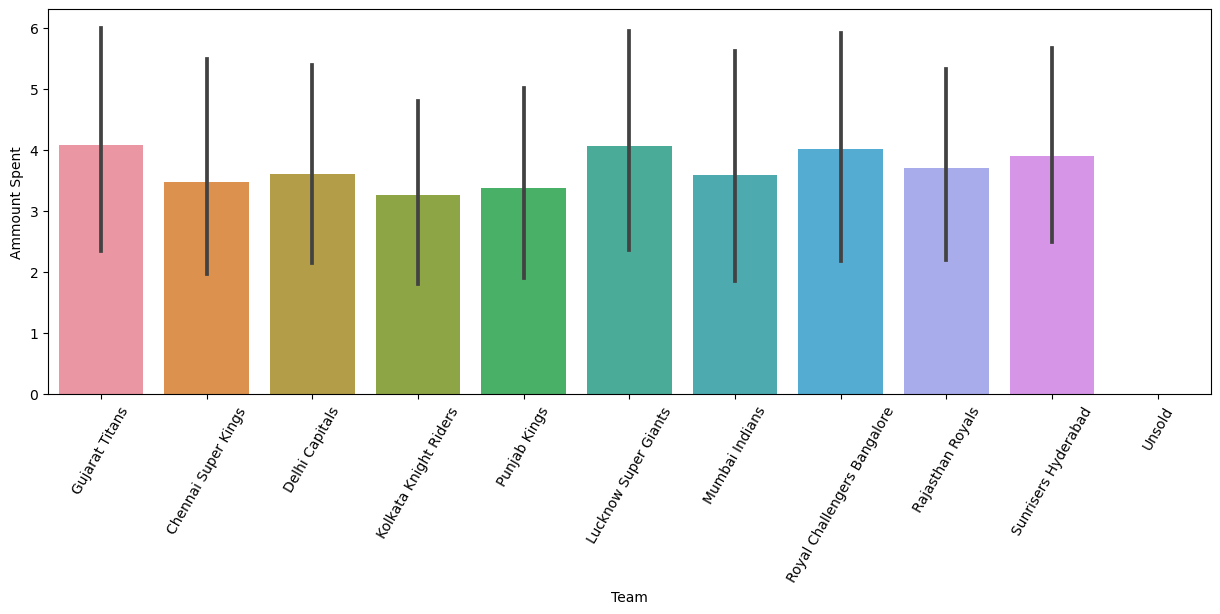

In [45]:
plt.figure(figsize=(15,5))
sns.barplot('Team','COST IN ₹ (CR.)', data = ipl[ipl['COST IN ₹ (CR.)']!='Unsold'])
plt.xticks(rotation=60)
plt.ylabel('Ammount Spent')
plt.show()

In [46]:
# 10 no player picked by each team
ipl['Team'].value_counts()

Unsold                         396
Chennai Super Kings             25
Kolkata Knight Riders           25
Punjab Kings                    25
Mumbai Indians                  25
Delhi Capitals                  24
Rajasthan Royals                24
Sunrisers Hyderabad             23
Gujarat Titans                  22
Lucknow Super Giants            22
Royal Challengers Bangalore     22
Name: Team, dtype: int64

NameError: name 'Team' is not defined

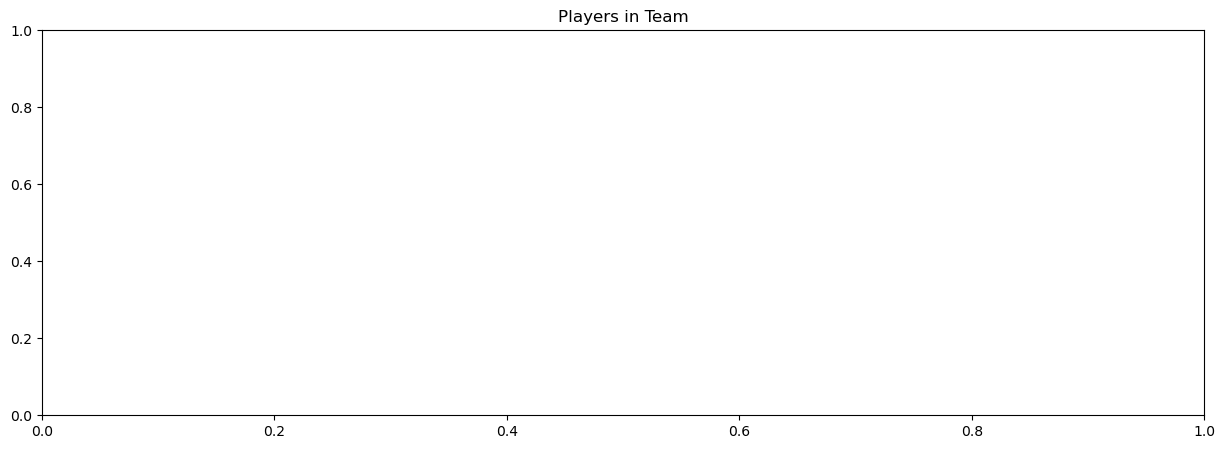

In [47]:
plt.figure(figsize=(15,5))
plt.title('Players in Team')
sns.barplot(y=Team,x=
plt.grid()

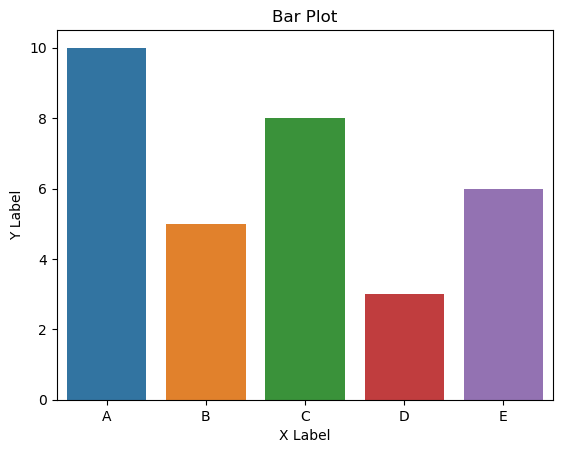

In [52]:
# create data
x = ['A', 'B', 'C', 'D', 'E']
y = [10, 5, 8, 3, 6]

# create a bar plot
sns.barplot(x=x, y=y)

# add labels
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Bar Plot')

# show plot
plt.show()

In [ ]:
ipl.info()

In [48]:
#11 
ipl.Team

0      Gujarat Titans
1      Gujarat Titans
2      Gujarat Titans
3      Gujarat Titans
4      Gujarat Titans
            ...      
628            Unsold
629            Unsold
630            Unsold
631            Unsold
632            Unsold
Name: Team, Length: 633, dtype: object

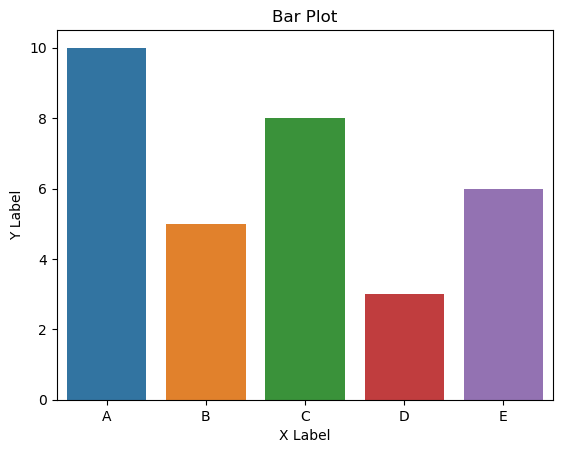

In [51]:
# create data
x = ['A', 'B', 'C', 'D', 'E']
y = [10, 5, 8, 3, 6]

# create a bar plot
sns.barplot(x=x, y=y)

# add labels
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Bar Plot')

# show plot
plt.show()